In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import pickle


def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [2]:
df = pd.read_csv("eda_data.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,48,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,37,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,11,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,56,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,23,1,0,0,0,1,data scientist,na,2728,3


In [4]:
# TODO
# choose relevant columns 
# get dummy data 
# train test split 
# multiple linear regression 
# lasso regression 
# random forest 
# tune models GridsearchCV 
# test ensembles 

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'mean_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [6]:
# choose relevant columns 
df_model = df[['mean_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided','job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]
df_model.head()

,mean_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,num_comp,hourly,employer_provided,job_state,same_state,age,python_yn,spark,aws,excel,job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,48,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,37,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,11,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,56,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,23,1,0,0,1,data scientist,na,2728


In [7]:
# get dummy data 
df_dum = pd.get_dummies(df_model) # transforms the categorical variables
df_dum.shape

(742, 178)

In [8]:
df_dum

,mean_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,48,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,37,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,11,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,56,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,23,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,3,0,0,0,191,0,0,1,...,0,0,0,0,0,0,1,0,0,1
738,102.5,4.4,3,0,0,0,15,1,1,1,...,0,1,0,0,0,0,0,0,0,1
739,73.5,2.6,0,0,0,1,37,0,0,0,...,0,0,0,0,0,0,1,0,1,0
740,127.5,3.2,0,0,0,0,-1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [9]:
# train test split 

X = df_dum.drop('mean_salary', axis=1)
y = df_dum.mean_salary.values # makes NumPy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

.508      0.612     -14.331       8.444
Size_1001 to 5000 employees                           6.0728      3.875      1.567      0.118      -1.538      13.684
Size_201 to 500 employees                             2.1759      3.867      0.563      0.574      -5.419       9.771
Size_5001 to 10000 employees                         -3.9273      5.440     -0.722      0.471     -14.612       6.757
Size_501 to 1000 employees                            2.0146      4.048      0.498      0.619      -5.935       9.964
Size_51 to 200 employees                              4.0596      4.405      0.922      0.357      -4.592      12.711
Size_Unknown                                         20.9221     14.009      1.494      0.136      -6.590      48.434
Type of ownership_-1                                 13.5666      8.631      1.572      0.117      -3.383      30.517
Type of ownership_College / University                6.1638     17.728      0.348      0.728     -28.653      40.981
Type of ownership_Company - Private                   8.6496      5.247      1.648      0.100      -1.656      18.955
Type of ownership_Company - Public                   13.2929      5.704      2.331      0.020       2.091      24.494
Type of ownership_Government                        -15.5595     15.297     -1.017      0.309     -45.601      14.482
Type of ownership_Hospital                           -7.0573      9.967     -0.708      0.479     -26.631      12.516
Type of ownership_Nonprofit Organization            -10.0978      6.702     -1.507      0.132     -23.261       3.065
Type of ownership_Other Organization                 -6.1100     14.342     -0.426      0.670     -34.277      22.058
Type of ownership_School / School District           -5.9558     23.799     -0.250      0.802     -52.696      40.785
Type of ownership_Subsidiary or Business Segment     12.8198      6.933      1.849      0.065      -0.797      26.437
Type of ownership_Unknown                            33.2005     28.611      1.160      0.246     -22.990      89.392
Industry_-1                                           5.7949      7.943      0.730      0.466      -9.805      21.394
Industry_Accounting                                   2.4448     13.486      0.181      0.856     -24.041      28.931
Industry_Advertising & Marketing                     11.8022      5.961      1.980      0.048       0.096      23.509
Industry_Aerospace & Defense                          5.5154      3.103      1.777      0.076      -0.579      11.610
Industry_Architectural & Engineering Services       -32.4525     15.937     -2.036      0.042     -63.751      -1.154
Industry_Auctions & Galleries                         9.3811     22.880      0.410      0.682     -35.553      54.315
Industry_Banks & Credit Unions                      -16.9190      8.055     -2.100      0.036     -32.739      -1.099
Industry_Beauty & Personal Accessories Stores        15.6296     21.566      0.725      0.469     -26.725      57.984
Industry_Biotech & Pharmaceuticals                    6.4081      2.044      3.135      0.002       2.394      10.422
Industry_Brokerage Services                          28.0966     15.523      1.810      0.071      -2.390      58.584
Industry_Colleges & Universities                     11.0667     13.013      0.850      0.395     -14.489      36.623
Industry_Computer Hardware & Software                -0.9465      3.250     -0.291      0.771      -7.329       5.436
Industry_Construction                               -15.6896     10.567     -1.485      0.138     -36.442       5.063
Industry_Consulting                                  12.9249      5.902      2.190      0.029       1.334      24.516
Industry_Consumer Product Rental                     -2.4472     13.018     -0.188      0.851     -28.014      23.120
Industry_Consumer Products Manufacturing             13.7766      9.858      1.397      0.163      -5.584      33.138
Industry_Department, Clothing, & Shoe Stores          4.7983     1

In [11]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3) # how far we are from average

# 20, 23, 22K dollars off in predictions

array([-2.01653061e+01, -2.39670596e+08, -2.24276304e+01])

-19.814018365784026


,alpha,error
1,0.02,-19.018243


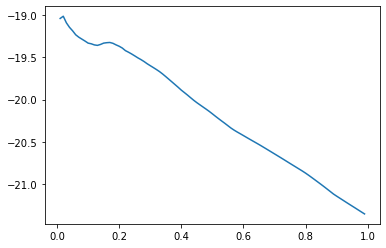

In [13]:
# lasso regression 
lm_l = Lasso(alpha=.02) 
lm_l.fit(X_train,y_train)
print(np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [14]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train.ravel())
np.mean(cross_val_score(sgd_reg, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)) # better than lasso

-5.304062172715161e+16

In [15]:
# random forest -- should work better as we have many 0/1s
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-15.006889324719273

In [16]:
# tune models GridsearchCV 
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = RandomizedSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

RandomForestRegressor(n_estimators=140)

In [17]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)
tpred_sgd = sgd_reg.predict(X_test)

print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))
print(mean_absolute_error(y_test,tpred_sgd))

mean_absolute_error(y_test, (tpred_lm+tpred_rf)/2)

138375609.04250935
19.117003101592555
11.20321188878236
4.827359305040846e+16


69187809.13681786

In [18]:
pickl = {'model': gs.best_estimator_}
pickle.dump(pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [20]:
X_test.iloc[1,:]

Rating               3.6
num_comp             0.0
hourly               0.0
employer_provided    0.0
same_state           1.0
                    ... 
job_simp_mle         0.0
job_simp_na          0.0
seniority_jr         0.0
seniority_na         1.0
seniority_senior     0.0
Name: 196, Length: 177, dtype: float64

In [22]:
list(X_test.iloc[1,:])[:10] # just 10 features

[3.6, 0.0, 0.0, 0.0, 1.0, 35.0, 0.0, 0.0, 0.0, 1.0]

In [28]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))

array([52.025])